# Question 4

## Datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[0, 0, 1],
               [0, 1, 1],
               [1, 0, 1],
               [1, 1, 1]])

In [2]:
y = np.array([[0],
             [1],
             [1],
             [0]])

In [3]:
np.random.seed(1)

## Model

In [4]:
class Model:

  def __init__(self, x_train, y_train, alpha = 0.05, batch = 60000):
    # initalize the weights randomly 
    # weight initialization depends on array dimensions
    self.w0 = 2*np.random.random((x_train.shape[1],x_train.shape[0])) -1
    self.w1 = 2*np.random.random((y_train.shape[0],1))
    self.x = x_train
    self.y = y_train
    self.alpha = alpha
    self.batch = batch
    self.losses = []

  #eq #1 
  def sigmoid(self, z):
    return 1 / (1 + np.exp( -z ))

  # sigmoid prime eq # 2
  def sigmoid_prime(self, z):
    return (z * (1 - z))

  # Cross-entropy loss function implemented
  def cross_entropy(self, y, a, n):
    return (y * np.log(a)) + ((1 - y) * np.log(1 - a)) / float((-1)/n)
  
  def train(self, verbose = 1):
    
    for cntr in range(self.batch):

      batch_x = self.x
      batch_y = self.y
      n = batch_x.shape[0]
      a0 = batch_x 
      z1 = np.dot(a0, self.w0)
      a1 = self.sigmoid(z1)
      z2 = np.dot(a1, self.w1)

      # second layer activation function values 
      a2 = self.sigmoid(z2)

      #l2_error = (a2 - batch_y)/n
      l2_error = self.cross_entropy(batch_y, a2, n)

      if cntr % 1000 == 0 and verbose == 1:
        print("Error: ", str(np.mean(np.mean(np.abs(l2_error)))))
      if cntr % 1000 == 0:
        self.losses.append(np.mean(np.mean(np.abs(l2_error))))

      # eq 6
      l2_delta = l2_error * self.sigmoid_prime(a2)

      l1_error = l2_delta.dot(self.w1.T)

      # eq 7 
      l1_delta = l1_error * self.sigmoid_prime(a1)

      # eq #  5 
      self.w1 -= self.alpha*a1.T.dot(l2_delta)
      self.w0 -= self.alpha*a0.T.dot(l1_delta)

    # return output after training
    return a2

  def predict(self, x_test):
    batch_x = x_test
    a0 = batch_x 
    z1 = np.dot(a0, self.w0)
    a1 = self.sigmoid(z1)
    z2 = np.dot(a1, self.w1)

    # second layer activation function values 
    a2 = self.sigmoid(z2)

    return a2

  def plot_error(self):
    plt.plot(self.losses)
    plt.show()

## Train, Test and Prediction

In [5]:
def test_NN():
  X1 = [1, 1, 0]
  X2 = [1, 1, 1]
  
  # model object
  model = Model(X, y)

  # Train the model
  a2 = model.train(verbose = 1)

  # Predictions
  y1 = model.predict(X1)
  y2 = model.predict(X2)

  print('\ny1: ', y1)
  print('y2: ', y2)

  print('\n\n')
  # Visualize the model error
  model.plot_error()

Error:  3.7768834336295978
Error:  1.2277455887253572
Error:  0.7270532265257841
Error:  0.3452186801012134
Error:  0.21986405381609786
Error:  0.16773523145492783
Error:  0.1388150117178017
Error:  0.12015094913541174
Error:  0.10695748508619399
Error:  0.09705043112133144
Error:  0.08928555872079566
Error:  0.0830024715631835
Error:  0.07779165584898376
Error:  0.07338473040047183
Error:  0.06959791094269344
Error:  0.06630076857595127
Error:  0.06339795862801484
Error:  0.0608180233683247
Error:  0.058506255113567586
Error:  0.05641999270529347
Error:  0.05452543107697733
Error:  0.05279540217248037
Error:  0.05120779706801408
Error:  0.04974442189257541
Error:  0.04839015370581612
Error:  0.04713230787464587
Error:  0.04596015721818468
Error:  0.04486456180262198
Error:  0.04383768058038544
Error:  0.04287274436976647
Error:  0.041963875366222085
Error:  0.04110594234587275
Error:  0.04029444352880038
Error:  0.03952541108176126
Error:  0.038795332700119464
Error:  0.03810108678080

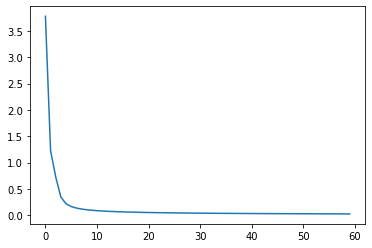

In [6]:
test_NN()